In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as sp

BICM (binomiale)

beta= 10.0 mrse= 1.1240397061476079e-08
Il massimo errore sulla massa è 2.140525669992073e-09 per beta= 5.555555555555555


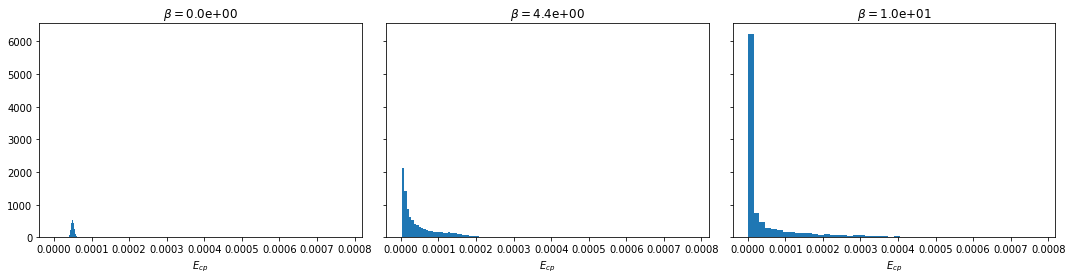

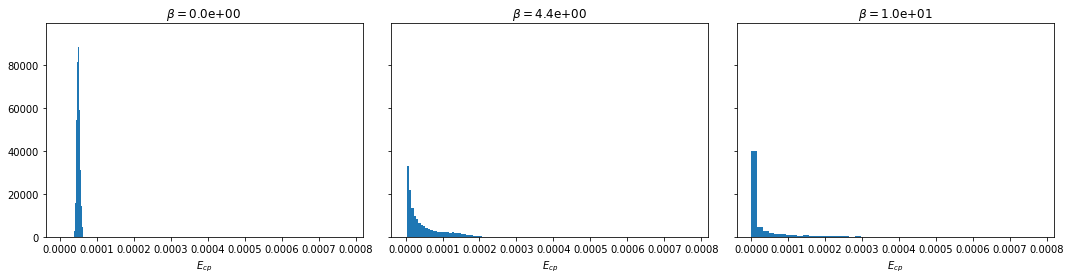

In [2]:
up,down=100,100 #matrix dimensions

biad_mat = (np.random.uniform(0,1e-4,up*down)).reshape(up,down)
strength=np.concatenate((biad_mat.sum(axis=0),biad_mat.sum(axis=1)))
L=sum(strength[:up]) #sum of the strengths

theta=np.array([-np.log(strength[i]/np.sqrt(L)) for i in range(up+down)]) #initialize potentials
costo=(np.random.uniform(0.1,1,up*down)).reshape(up,down)
betas=np.linspace(0,10,10) 
beta_tbs=3 #number of betas to be shown in plots

def funz(theta, beta, costo): #function of the system to solve
    x=theta[0:up]
    y=theta[up:down+up]
    argomento = np.add.outer(x, y)+beta*costo
    transp_plan = (np.exp(-argomento)) / (1 + np.exp(-argomento)) 
    e_strength = np.concatenate((transp_plan.sum(axis=0),transp_plan.sum(axis=1)))
    return strength-e_strength

piani=[] #lists to save data
errori=[]
masse=[]
argomenti=[]
potenziali=[]

for beta in betas: #loop on every beta, each starts from the previous final theta
    final = sp.fsolve(funz, theta, args=(beta, costo)) #solve method
    mrse = np.abs(funz(final, beta, costo))/strength
    mrse = np.max(mrse) #error update
    if mrse>1e-5: #check on the constraints
        print("Method not converged. Beta=", beta, "MRSE=", mrse)
        break
    theta=final 
    x=theta[0:up] #compute the final transport plan
    y=theta[up:down+up]
    argomento = np.add.outer(x, y)+beta*costo
    transp_plan = (np.exp(-argomento)) / (1 + np.exp(-argomento)) 

    argomenti.append([np.mean(argomento),np.mean(x),np.mean(y)]) #save data for each beta
    masse.append((sum(transp_plan.flatten())-L)/L)
    piani.append(transp_plan.flatten())
    errori.append(mrse)
    potenziali.append(theta)

print("beta=",beta,"mrse=", mrse) #print result, with relative errors on constraints (mrse) and on the mass (max(conferma))
print("Il massimo errore sulla massa è",max(masse), "per beta=", betas[np.where(masse==max(masse))][0])

#save the transport plans and plot hists
piani=np.array(piani)
np.savetxt("piani_DB.txt", piani) 

fig, ax = plt.subplots(figsize=(15, 4), tight_layout=True, ncols=beta_tbs, sharex=True, sharey=True)
ind=np.linspace(0,len(piani)-1, beta_tbs).astype(int)

for i in range(beta_tbs):
    ax[i].hist(piani[ind[i]], bins=50)
    ax[i].set_title(r'$\beta=$'+"%.1e" % betas[ind[i]])
    ax[i].set_xlabel(r'$E_{cp}$')
plt.savefig("transizione_DB"+str(up)+"x"+str(down)+".pdf")

fig2, ax2 = plt.subplots(figsize=(15, 4), tight_layout=True, ncols=beta_tbs, sharex=True, sharey=True)

for i in range(beta_tbs):
    ax2[i].hist(piani[ind[i]], bins=50, density=True)
    ax2[i].set_title(r'$\beta=$'+"%.1e" % betas[ind[i]])
    ax2[i].set_xlabel(r'$E_{cp}$')
plt.show()
plt.close()

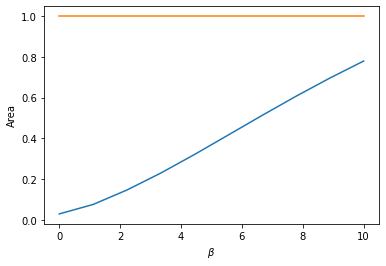

In [3]:
areas=[]
piani=np.loadtxt("piani_DB.txt", delimiter=' ', dtype=float)

for i in range(len(betas)):
    values, bins, _ = plt.hist(piani[i])
    values1, bins1, _ = plt.hist(piani[i], density=True)
    plt.close()
    area = sum(np.diff(bins)*values)
    area1 = sum(np.diff(bins1)*values1)
    areas.append([area, area1])
plt.plot(betas,areas)
plt.xlabel(r"$\beta$")
plt.ylabel("Area")
plt.show()

CONTINUO BOUNDED (wrapped exponential)

beta= 50000.0 mrse= 3.10637509429589e-11
Il massimo errore sulla massa è 3.148852233487278e-10 per beta= 10526.315789473685


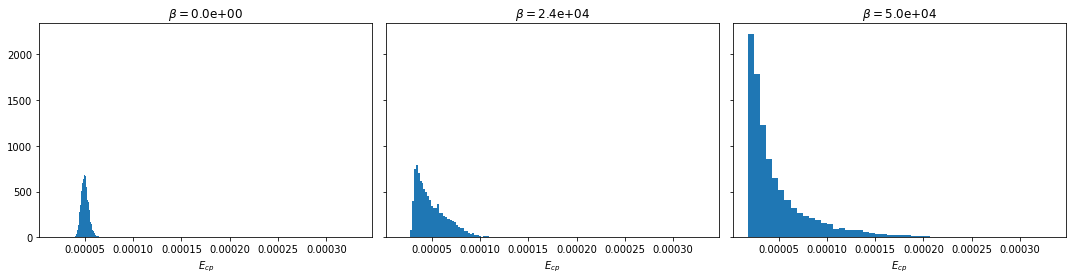

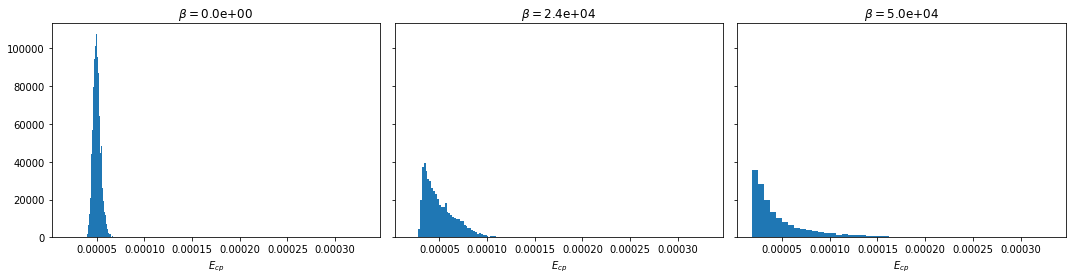

In [4]:
up,down=100,100 #matrix dimensions
biad_mat = (np.random.uniform(0,1e-4,up*down)).reshape(up,down)

strength=np.concatenate((biad_mat.sum(axis=1),biad_mat.sum(axis=0)))
L=sum(strength[:up]) #sum of the strengths

theta=np.array([np.random.uniform(0,1) for i in range(up+down)]) #initialize potentials
costo=(np.random.uniform(0.1,1,up*down)).reshape(up,down)
betas=np.linspace(0,50000,20) 
beta_tbs=3 #number of betas to be shown in plots

def funz(theta, beta, costo): #function of the system to solve
    x=theta[0:up]
    y=theta[up:down+up]
    argomento = np.add.outer(x, y)+beta*costo
    transp_plan = 1 / argomento - (np.exp(-argomento)) / (1 - np.exp(-argomento)) 
    e_strength = np.concatenate((transp_plan.sum(axis=1),transp_plan.sum(axis=0)))
    return strength-e_strength

piani=[] #lists to save data
errori=[]
masse=[]
argomenti=[]
potenziali=[]

for i in range(len(betas)): #fixed point method loop for each beta
    final = sp.fsolve(funz, theta, args=(betas[i], costo))#solve method
    mrse = np.abs(funz(final, betas[i], costo))/strength
    mrse = np.max(mrse) #error update
    if mrse>1e-5: #check on the constraints
        print("Method not converged. Beta=", betas[i], "MRSE=", mrse)
        break
    theta=final #compute the final transport plan
    x=theta[0:up]
    y=theta[up:down+up]
    argomento = np.add.outer(x, y)+betas[i]*costo
    transp_plan = 1 / argomento - (np.exp(-argomento)) / (1 - np.exp(-argomento)) 

    argomenti.append([np.mean(argomento),np.mean(x),np.mean(y)]) #save data for each beta
    masse.append((sum(transp_plan.flatten())-L)/L)
    piani.append(transp_plan.flatten())
    errori.append(mrse)
    potenziali.append(theta)

print("beta=",betas[-1],"mrse=", mrse) #print result, with relative errors on constraints (mrse) and on the mass (max(conferma))
print("Il massimo errore sulla massa è",max(masse), "per beta=", betas[np.where(masse==max(masse))][0])

#save the transport plans and plot hists
piani=np.array(piani)
np.savetxt("piani_CB.txt", piani)

fig, ax = plt.subplots(figsize=(15, 4), tight_layout=True, ncols=beta_tbs, sharex=True, sharey=True)
ind=np.linspace(0,len(piani)-1, beta_tbs).astype(int)

for i in range(beta_tbs):
    ax[i].hist(piani[ind[i]], bins=50)
    ax[i].set_title(r'$\beta=$'+"%.1e" % betas[ind[i]])
    ax[i].set_xlabel(r'$E_{cp}$')
fig, ax = plt.subplots(figsize=(15, 4), tight_layout=True, ncols=beta_tbs, sharex=True, sharey=True)

for i in range(beta_tbs):
    ax[i].hist(piani[ind[i]], bins=50, density=True)
    ax[i].set_title(r'$\beta=$'+"%.1e" % betas[ind[i]])
    ax[i].set_xlabel(r'$E_{cp}$')

plt.savefig("transizione_CB"+str(up)+"x"+str(down)+".pdf")
plt.show()
plt.close()

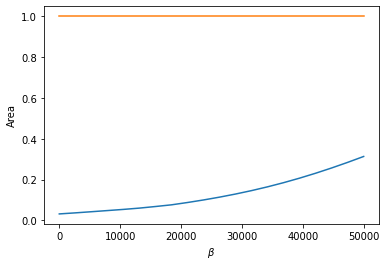

In [5]:
areas=[]
piani=np.loadtxt("piani_CB.txt", delimiter=' ', dtype=float)

for i in range(len(betas)):
    values, bins, _ = plt.hist(piani[i])
    values1, bins1, _ = plt.hist(piani[i], density=True)
    plt.close()
    area = sum(np.diff(bins)*values)
    area1 = sum(np.diff(bins1)*values1)
    areas.append([area, area1])
plt.plot(betas,areas)
plt.xlabel(r"$\beta$")
plt.ylabel("Area")
plt.show()